In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('adversarial log.csv')

# Display the first few rows of the DataFrame
print(df.head())

   Layer  noise_epochs  alpha  epsilon  average test loss  accuracy  \
0     18             5   0.01     0.00           0.577271    0.8239   
1     18             5   0.01     0.01           5.485591    0.1638   
2     18             5   0.01     0.02          12.427530    0.0182   
3     18             5   0.01     0.03          16.978756    0.0087   
4     18             5   0.01     0.04          19.110320    0.0069   

   average similarity  
0            1.000000  
1            0.999809  
2            0.999419  
3            0.998845  
4            0.998502  


In [5]:
fgsmvpgd_df = df[(df['alpha'] == 0.009) & (df['epsilon'] == 0.032) & (df['noise_epochs'].isin([1, 2, 3, 4, 5]))]
sorted_df = fgsmvpgd_df.sort_values(by=['Layer', 'noise_epochs'])

print(sorted_df)

     Layer  noise_epochs  alpha  epsilon  average test loss  accuracy  \
227     18             1  0.009    0.032           3.302926    0.3365   
234     18             2  0.009    0.032           7.690610    0.0766   
235     18             3  0.009    0.032          12.065457    0.0215   
236     18             4  0.009    0.032          15.218409    0.0121   
193     18             5  0.009    0.032          17.070542    0.0094   
230     50             1  0.009    0.032           3.671934    0.3858   
237     50             2  0.009    0.032           8.610160    0.1089   
238     50             3  0.009    0.032          13.018228    0.0309   
239     50             4  0.009    0.032          16.107994    0.0123   
208     50             5  0.009    0.032          18.123790    0.0064   
233    152             1  0.009    0.032           2.799178    0.3914   
240    152             2  0.009    0.032           6.064044    0.1205   
241    152             3  0.009    0.032           

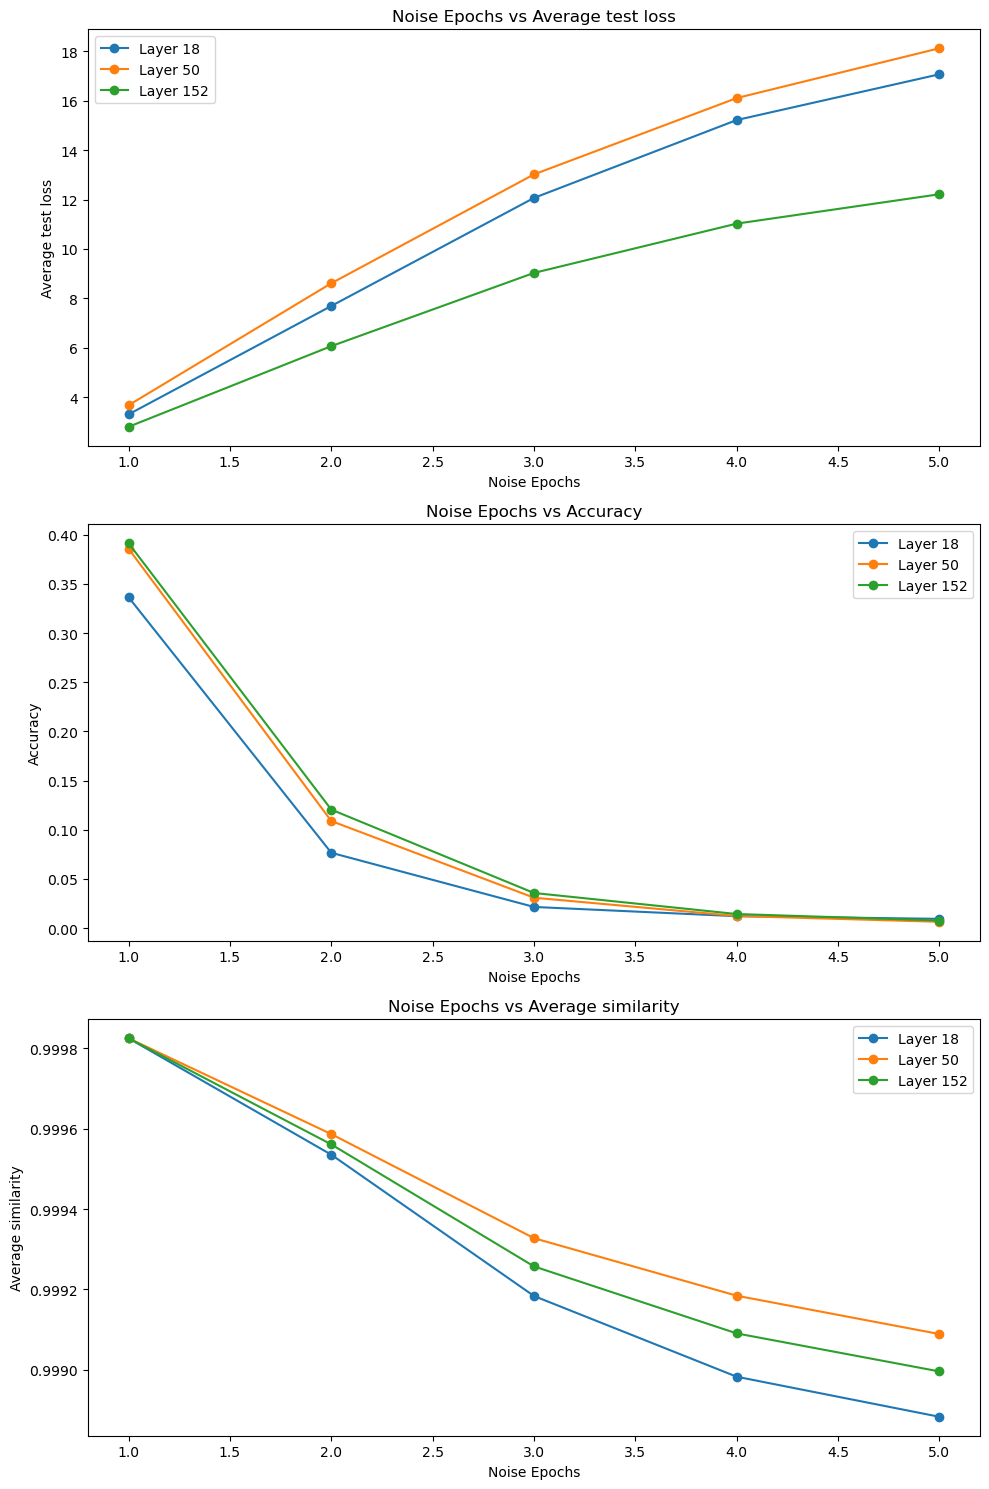

In [12]:
import matplotlib.pyplot as plt

filtered_df = df[
    (df['alpha'] == 0.009) &
    (df['epsilon'] == 0.032) &
    (df['noise_epochs'].isin([1, 2, 3, 4, 5]))
]

filtered_df = filtered_df.sort_values(by=['Layer', 'noise_epochs'])


# Define the layers and metrics
layers = [18, 50, 152]
metrics = ['average test loss', 'accuracy', 'average similarity']

fig, axs = plt.subplots(3, figsize=(10, 15))

# Loop through the metrics
for i, metric in enumerate(metrics):
    for layer in layers:
        layer_data = filtered_df[filtered_df['Layer'] == layer]
        axs[i].plot(layer_data['noise_epochs'], layer_data[metric], 'o-', label=f'Layer {layer}')

    axs[i].set_title(f'Noise Epochs vs {metric.capitalize()}')
    axs[i].set_xlabel('Noise Epochs')
    axs[i].set_ylabel(metric.capitalize())
    axs[i].legend()

plt.tight_layout()
plt.show()

     Layer  noise_epochs  alpha  epsilon  average test loss  accuracy  \
183     18             5  0.003    0.032           7.794414    0.0817   
188     18             5  0.006    0.032          14.783480    0.0146   
193     18             5  0.009    0.032          17.070542    0.0094   
198     50             5  0.003    0.032           9.816069    0.0978   
203     50             5  0.006    0.032          16.001813    0.0163   
208     50             5  0.009    0.032          18.123790    0.0064   
213    152             5  0.003    0.032           6.386226    0.1203   
218    152             5  0.006    0.032          10.778314    0.0180   
223    152             5  0.009    0.032          12.214256    0.0077   

     average similarity  
183            0.999719  
188            0.999133  
193            0.998883  
198            0.999783  
203            0.999357  
208            0.999089  
213            0.999753  
218            0.999254  
223            0.998996  


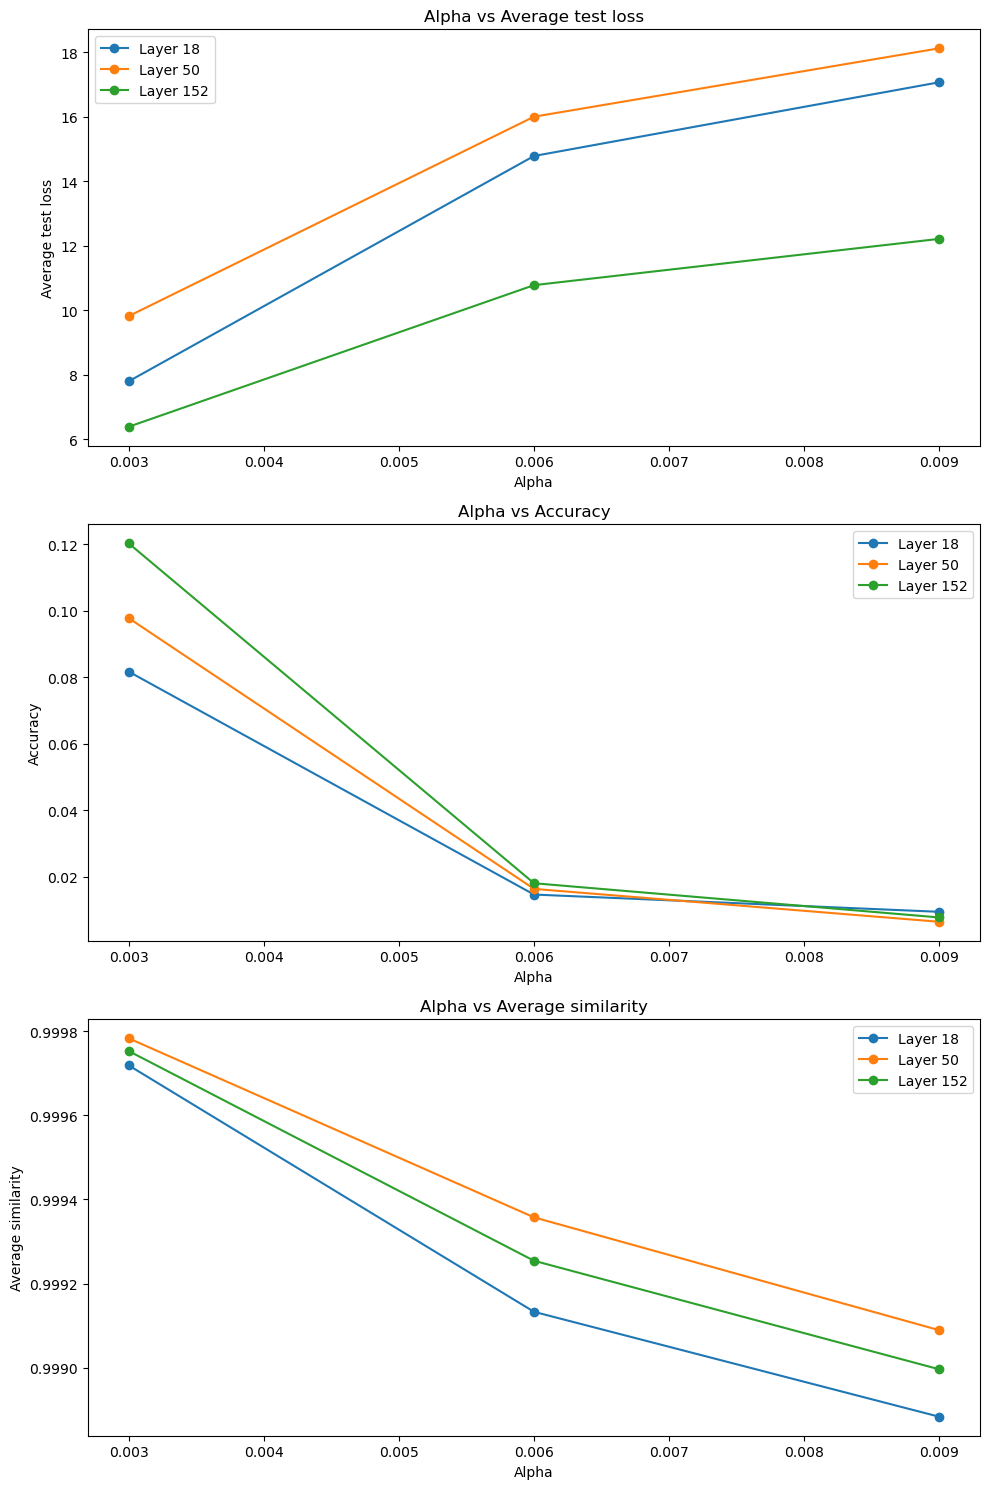

In [13]:
filtered_df = df[
    (df['noise_epochs'] == 5) &
    (df['alpha'].isin([0.003, 0.006, 0.009])) &
    (df['epsilon'] == 0.032)
]

filtered_df = filtered_df.sort_values(by=['Layer', 'alpha'])
print(filtered_df)

# Define the layers and metrics
layers = [18, 50, 152]
metrics = ['average test loss', 'accuracy', 'average similarity']

fig, axs = plt.subplots(3, figsize=(10, 15))

for i, metric in enumerate(metrics):
    for layer in layers:
        layer_data = filtered_df[filtered_df['Layer'] == layer]
        axs[i].plot(layer_data['alpha'], layer_data[metric], 'o-', label=f'Layer {layer}')

    axs[i].set_title(f'Alpha vs {metric.capitalize()}')
    axs[i].set_xlabel('Alpha')
    axs[i].set_ylabel(metric.capitalize())
    axs[i].legend()

plt.tight_layout()
plt.show()

    Layer  noise_epochs  alpha  epsilon  average test loss  accuracy  \
0      18             5   0.01     0.00           0.577271    0.8239   
1      18             5   0.01     0.01           5.485591    0.1638   
2      18             5   0.01     0.02          12.427530    0.0182   
3      18             5   0.01     0.03          16.978756    0.0087   
4      18             5   0.01     0.04          19.110320    0.0069   
5      18             5   0.01     0.05          20.343001    0.0065   
6      18             5   0.01     0.06          20.342992    0.0065   
7      18             5   0.01     0.07          20.342953    0.0065   
8      18             5   0.01     0.08          20.342916    0.0065   
9      18             5   0.01     0.09          20.342997    0.0065   
30     50             5   0.01     0.00           0.429072    0.8790   
31     50             5   0.01     0.01           7.746722    0.1309   
32     50             5   0.01     0.02          14.785585    0.

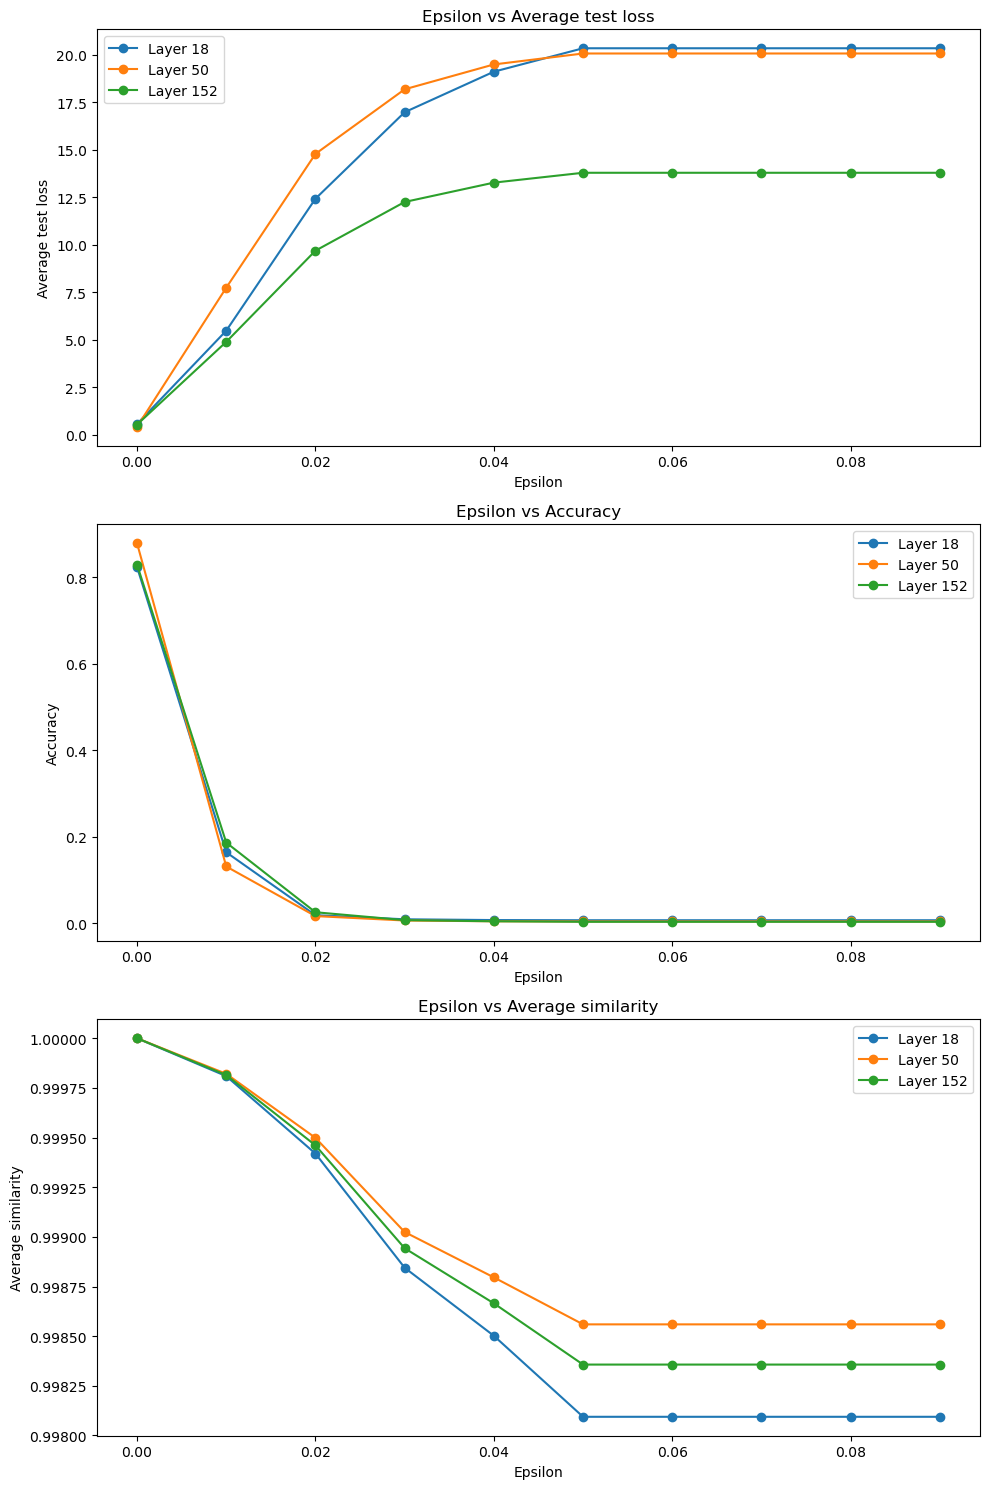

In [15]:
filtered_df = df[
    (df['noise_epochs'] == 5) &
    (df['alpha'] == 0.01) &
    (df['epsilon'].isin([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]))
]

filtered_df = filtered_df.sort_values(by=['Layer', 'epsilon'])
filtered_df = filtered_df.drop_duplicates(subset=['Layer', 'epsilon'])
print(filtered_df)

# Define the layers and metrics
layers = [18, 50, 152]
metrics = ['average test loss', 'accuracy', 'average similarity']

fig, axs = plt.subplots(3, figsize=(10, 15))

for i, metric in enumerate(metrics):
    for layer in layers:
        layer_data = filtered_df[filtered_df['Layer'] == layer]
        axs[i].plot(layer_data['epsilon'], layer_data[metric], 'o-', label=f'Layer {layer}')

    axs[i].set_title(f'Epsilon vs {metric.capitalize()}')
    axs[i].set_xlabel('Epsilon')
    axs[i].set_ylabel(metric.capitalize())
    axs[i].legend()

plt.tight_layout()
plt.show()